In [352]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#reading inputs
train_file_path = '../input/titanic/train.csv'
test_file_path = '../input/titanic/test.csv'

df = pd.read_csv(train_file_path)
td = pd.read_csv(test_file_path)


# Preprocessing 

## Check For Null and Duplicated Values

In [353]:
Dup_Rows = df [df .duplicated()]
print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [354]:
#check for null values in Training data
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [355]:
#check for null values in Test data
td.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Preprocessing of Training Data 


In [356]:
#replace strings in Training data with value to be able to process them
df['Sex'].replace('female',0 ,inplace=True)
df['Sex'].replace('male',1 ,inplace=True)

df['Embarked'].replace('C',1 ,inplace=True)
df['Embarked'].replace('S',2 ,inplace=True)
df['Embarked'].replace('Q',3 ,inplace=True)

#replace null values of age attribute to be able to process them

df['Age'] = df['Age'].replace(np.nan, df['Age'].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


## Preprocessing of test Data 


In [357]:
#replace strings in Test data with value to be able to process them
td['Sex'].replace('female',0 ,inplace=True)
td['Sex'].replace('male',1 ,inplace=True)

td['Embarked'].replace('C',1 ,inplace=True)
td['Embarked'].replace('S',2 ,inplace=True)
td['Embarked'].replace('Q',3 ,inplace=True)

#replace null values of age attribute to be able to process them

td['Age'] = td['Age'].replace(np.nan, td['Age'].median())
td['Fare'] = td['Fare'].replace(np.nan, td['Fare'].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


In [358]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [359]:
td.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# **Visualize The Data (histogram)**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

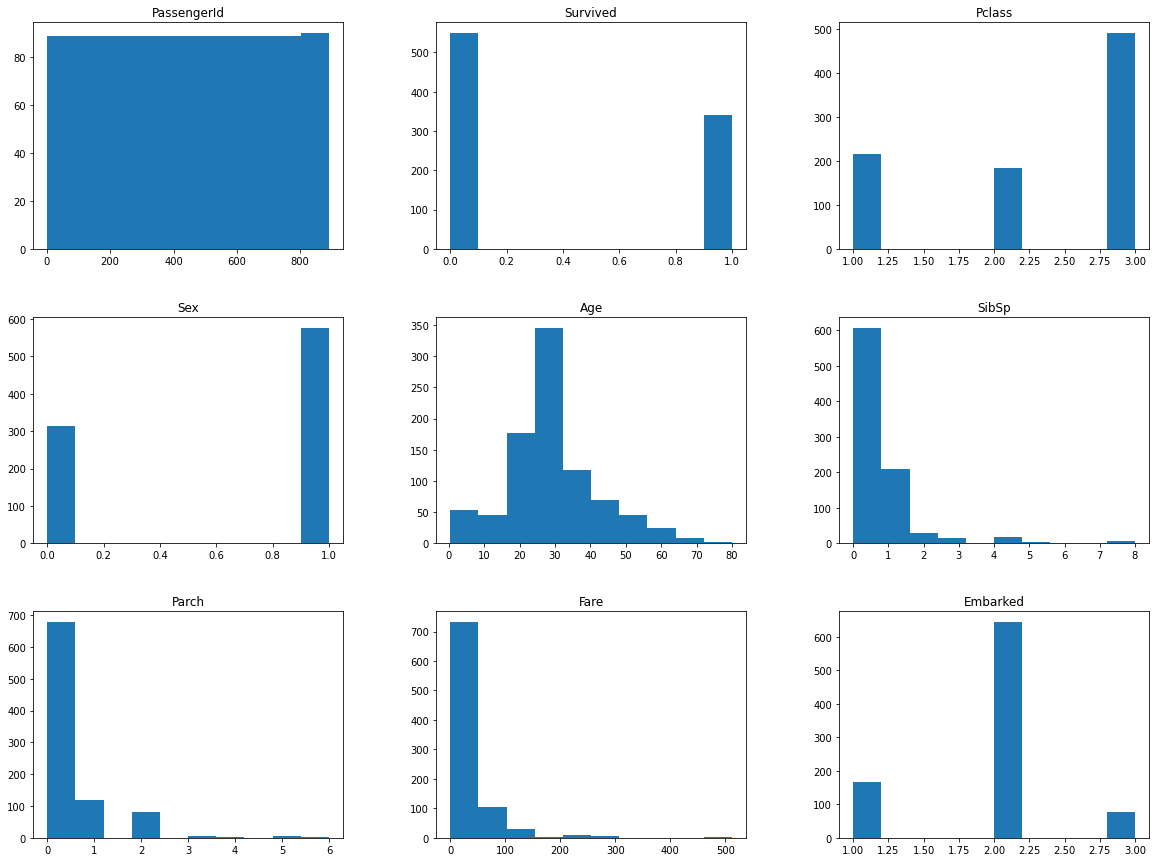

In [360]:
df.hist(df.columns,grid=False, figsize=(20,15))

# **Visualize The Data (correlation)**

In [361]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.017487
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.307324
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.023175
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.041031
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.031095
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.035756
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.017487,-0.126753,0.307324,0.023175,-0.041031,0.031095,-0.035756,-0.269588,1.000000


# Processing

In [362]:
"""
From correlation figure we deduce that Sex and Pclass and Fare attributes will be our Features
because they are stronger more than others
"""
features= ['Sex', 'Fare','Pclass']
X=df[features]
y = df.Survived


# Model Evaluation

# #  Cross Validation

In [363]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits= 12, shuffle=True, random_state=0)

# Nearest Neighbour Model

In [364]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
scores = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
NN_score=round(np.mean(scores)*100, 2)

# Random Forest Model

In [365]:
clf = RandomForestClassifier(random_state=0)
scoring = 'accuracy'
scores = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
RF_score=round(np.mean(scores)*100, 2)

# Naive Bayes

In [366]:
clf = GaussianNB()
scoring = 'accuracy'
scores = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
NB_score=round(np.mean(scores)*100, 2)

# Decision Tree

In [367]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
scores = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
DT_score=round(np.mean(scores)*100, 2)

# Choosing Best Model

In [368]:
results = pd.DataFrame({
    'Model': [ 'Nearest Neighbour','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [ NN_score, RF_score, NB_score,DT_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.49,Random Forest
82.38,Decision Tree
77.78,Naive Bayes
74.97,Nearest Neighbour


# Hyperparameter Tuning


In [369]:
param_grid = {
    'max_depth': [5,10,20],
    'max_features': [2, 3],
    'min_samples_leaf': [1,3, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200,500]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


**Due to Runtime of hyperparameter tuning I run it only one time and take it's output**

In [370]:
#grid_search.fit(X, y)
#grid_search.best_params_

# Hyperparameter Tuning output

In [371]:
#this the output of Hyperparameter Tuning
"""
{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}
 """
#Due to Runtime of hyperparameter tuning I run it only one time and take it's output

"\n{'max_depth': 5,\n 'max_features': 2,\n 'min_samples_leaf': 1,\n 'min_samples_split': 2,\n 'n_estimators': 500}\n "

# Testing

In [372]:
# RandomForestClassifier parameters are taken from Hyperparameter Tuning output
forest_model = RandomForestClassifier(max_depth= 5,max_features= 2,min_samples_leaf= 1,
                                      min_samples_split= 2,n_estimators= 500,random_state=42)
forest_model.fit(X, y)
TD_features=td[features] #TD_features are features of testing data
melb_preds = forest_model.predict(TD_features)
sd=pd.DataFrame({"PassengerId":td["PassengerId"],"Survived":melb_preds})
sd.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Submission file

In [373]:
sd.to_csv("submission.csv",index=False)